## Pandas

In [1]:
import pandas
stock = pandas.read_excel('https://raw.githubusercontent.com/ywchiu/tibamepy/master/data/stock.xlsx')

In [3]:
stock.head()

,id,年度,股本,財報評分,收盤,平均,漲跌,漲跌%,營業收入,營業毛利,...,營業毛利%,營業利益%,業外損益%,稅後淨利%,ROE,ROA,稅後EPS,EPS成長,BPS,stockid
0,1,2015,369.0,45,27.3,37.8,-16.1,-37.1,937.0,145.0,...,15.5,10.3,-1.08,7.39,4.36,2.36,1.56,-1.37,29.26,1101
1,2,2014,369.0,53,43.4,45.7,-2.85,-6.2,1183.0,249.0,...,21,16.8,1.13,14,10.50,5.76,2.93,0.21,31.95,1101
2,3,2013,369.0,51,46.25,39.8,7.35,18.9,1161.0,228.0,...,19.7,15.3,0.71,13,10.60,5.56,2.72,0.63,30.63,1101
3,4,2012,369.0,49,38.9,35.8,3.9,11.1,1195.0,177.0,...,14.8,10.9,-0.84,8.34,7.63,3.81,2.09,-0.24,27.03,1101
4,5,2011,369.0,55,35,36.8,2.2,6.7,1185.0,206.0,...,17.4,13.6,0.3,11.6,10.80,5.24,2.33,-0.1,26.21,1101


In [5]:
tw2330 = pandas.read_json('https://raw.githubusercontent.com/ywchiu/tibamepy/master/data/2330.json')

In [7]:
tw2330.head()

,Date,Open,High,Low,Close,Volume,Adj Close
0,2016-07-21,171.0,172.0,170.0,172.0,33130000,172.0
1,2016-07-20,170.0,170.5,169.0,170.0,38053000,170.0
2,2016-07-19,170.5,170.5,169.0,170.5,42456000,170.5
3,2016-07-18,168.0,170.0,168.0,169.5,24749000,169.5
4,2016-07-15,169.5,169.5,169.5,169.5,41000,169.5


## GET

In [64]:
import requests
res = requests.get('https://tw.appledaily.com/new/realtime')
res

<Response [200]>

In [66]:
type(res)

requests.models.Response

In [65]:
#res.text

In [11]:
res = requests.get('https://ecapi.pchome.com.tw/ecshop/prodapi/v2/prod/button&id=DGCN1A-A9009EVNY&fields=Seq,Id,Price,Qty,ButtonType,SaleStatus,isPrimeOnly&_callback=jsonp_button&1538278200?_callback=jsonp_button')
res.text

'try{jsonp_button([{"Seq":21071063,"Id":"DGCN1A-A9009EVNY-000","Price":{"M":16900,"P":15900,"Prime":""},"Qty":"10","ButtonType":"ForSale","SaleStatus":1,"isPrimeOnly":0}]);}catch(e){if(window.console){console.log(e);}}'

## POST

In [12]:
import requests

url     = 'https://www.thsrc.com.tw/tw/TimeTable/Search'

payload = {
'StartStationName':  '台北站',
'EndStationName'  :  '桃園站',
'SearchType'      :  'S',
'StartStation'    : '977abb69-413a-4ccf-a109-0272c24fd490',
'EndStation'      : 'fbd828d8-b1da-4b06-a3bd-680cdca4d2cd',
'DepartueSearchDate': '2018/09/30',
'DepartueSearchTime': '13:00'    
    
}

res = requests.post(url, data = payload)
res

<Response [200]>

In [20]:
#res.text

# JSON => Python Dict
res.json()['data']['DepartureTable']['TrainItem']


import pandas
pandas.DataFrame(res.json()['data']['DepartureTable']['TrainItem']).head()

,DepartureTime,DestinationTime,Discount,Duration,NonReservedCar,Note,Sequence,StationInfo,TrainNumber
0,06:26,06:47,[{'Id': '4baae6e5-b42c-474b-a194-ff8f1783c7bb'...,00:21,3,,0,"[{'StationNo': '01', 'StationName': '南港站', 'De...",0803
1,06:51,07:13,[{'Id': '4baae6e5-b42c-474b-a194-ff8f1783c7bb'...,00:22,3,,1,"[{'StationNo': '01', 'StationName': '南港站', 'De...",0603
2,07:11,07:32,[{'Id': '68d9fc7b-7330-44c2-962a-74bc47d2ee8a'...,00:21,3,,2,"[{'StationNo': '01', 'StationName': '南港站', 'De...",0805
3,07:46,08:07,[{'Id': '4baae6e5-b42c-474b-a194-ff8f1783c7bb'...,00:21,3,,3,"[{'StationNo': '01', 'StationName': '南港站', 'De...",0609
4,08:11,08:32,[{'Id': '4baae6e5-b42c-474b-a194-ff8f1783c7bb'...,00:21,3,,4,"[{'StationNo': '01', 'StationName': '南港站', 'De...",0809


## 台鐵快速查詢
- http://twtraffic.tra.gov.tw/twrail/TW_QuickSearch.aspx

## MOMO購物

In [41]:
import requests
headers = {
    'user-agent': 'Mozilla/5.0 (Windows NT 6.1; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/69.0.3497.100 Safari/537.36',  
}
res = requests.get('https://www.momoshop.com.tw/goods/GoodsDetail.jsp?i_code=4778291&str_category_code=1903000021', headers = headers)

In [35]:
res.text.split('salePrice =')[1].split(';')[0]

" '15990'"

## Split 用法

In [36]:
a = '123189237129@233827493@12312380@12313'
a.split('@')

['123189237129', '233827493', '12312380', '12313']

## 巴哈姆特

In [53]:
res = requests.get('https://www.gamer.com.tw/')
data = res.text.split('var list = ')[1].split('\n')[0].strip(';')

In [56]:
import json
#json.loads(data)

## BeautifulSoup 文件
- https://beautifulsoup.readthedocs.io/zh_CN/v4.4.0/

In [57]:
html_sample = '''
<html>
<body>
<h1 id="title">Hello World</h1>
<a href="#" class="link">This is link1</a>
<a href="# link2" class="link">This is link2</a>
</body>
</html>
'''

In [ ]:
import requests
import bs4 
from bs4 import BeautifulSoup

requests.get
bs4.BeautifulSoup

In [58]:
a = [2,3,4,5,6]
sum(a)

20

In [59]:
sum = 5

In [60]:
sum(a)

TypeError: 'int' object is not callable

In [61]:
from bs4 import BeautifulSoup
html_sample = '''
<html>
<body>
<h1 id="title">Hello World</h1>
<a href="#" class="link">This is link1</a>
<a href="# link2" class="link">This is link2</a>
</body>
</html>
'''

soup = BeautifulSoup(html_sample, 'lxml')

In [67]:
type(soup)

bs4.BeautifulSoup

In [63]:
soup.text

'\n\nHello World\nThis is link1\nThis is link2\n\n\n'

### select_one => BeautifulSoup Object
### select         => List

In [69]:
soup.select_one('h1')

<h1 id="title">Hello World</h1>

In [71]:
soup.select_one('h1').text

'Hello World'

In [73]:
soup.select_one('a')

<a class="link" href="#">This is link1</a>

In [75]:
soup.select('a')

[<a class="link" href="#">This is link1</a>,
 <a class="link" href="# link2">This is link2</a>]

In [77]:
soup.select('a')[0].text

'This is link1'

In [79]:
soup.select('h1')

[<h1 id="title">Hello World</h1>]

In [81]:
soup.select('h1')[0]

<h1 id="title">Hello World</h1>

In [82]:
soup.select('h1')[0].text

'Hello World'

In [83]:
soup

<html>
<body>
<h1 id="title">Hello World</h1>
<a class="link" href="#">This is link1</a>
<a class="link" href="# link2">This is link2</a>
</body>
</html>

In [85]:
# id => #
soup.select_one('#title')

<h1 id="title">Hello World</h1>

In [87]:
# class => .
soup.select('.link')

[<a class="link" href="#">This is link1</a>,
 <a class="link" href="# link2">This is link2</a>]

In [88]:
soup.select_one('h1#title')

<h1 id="title">Hello World</h1>

In [89]:
soup.select('a.link')

[<a class="link" href="#">This is link1</a>,
 <a class="link" href="# link2">This is link2</a>]

In [91]:
soup.select_one('body h1#title')

<h1 id="title">Hello World</h1>

In [93]:
soup.select_one('body > h1#title')

<h1 id="title">Hello World</h1>

In [94]:
soup.select('body a.link')

[<a class="link" href="#">This is link1</a>,
 <a class="link" href="# link2">This is link2</a>]

## CSS 參考
- http://www.w3school.com.cn/css/css_syntax_attribute_selector.asp

In [98]:
for link in soup.select('body a.link'):
    #print(link)
    #print(link.text)
    print(link.get('href'))

#
# link2


In [101]:
s = '<a href="https://www.largitdata.com" data-id=123 data-attr="qoo">'
s2 = BeautifulSoup(s, 'lxml')
s2.select_one('a').get('data-id')
s2.select_one('a').get('data-attr')

'qoo'

## 資料蒐集實務

In [114]:
import requests
res = requests.get('https://tw.appledaily.com/new/realtime')
res

<Response [200]>

In [115]:
from bs4 import BeautifulSoup
soup = BeautifulSoup(res.text, 'lxml')

In [140]:
#soup.select('li.rtddt a')
for news in soup.select('.rtddt a'):
    #print(news)
    title    = news.select_one('h1').text
    category = news.select_one('h2').text
    dt       = news.select_one('time').text
    link     = news.get('href')
    print(title, category, dt, link)
    print('========================================')

嚴正嵐笑喊愛情麵包雙收　以結婚為前提嫁給... 娛樂 14:37 https://tw.entertainment.appledaily.com/realtime/20180930/1438965/
中國停售來往新疆車票　傳秘密轉移維吾爾人 國際 14:35 https://tw.news.appledaily.com/international/realtime/20180930/1438994/
監院發函本周五約詢管中閔　仍未獲答覆 政治 14:35 https://tw.news.appledaily.com/politics/realtime/20180930/1438931/
騰訊總裁清晨6點叫起床　宣布20歲生日頭... 財經 14:33 https://tw.finance.appledaily.com/realtime/20180930/1438995/
新時代來了　央行：政策傳遞效果弱化、將調... 財經 14:30 https://tw.finance.appledaily.com/realtime/20180930/1438991/
【更新】連3安加統一守備失誤　4局統一0...(721) 體育 14:29 https://tw.sports.appledaily.com/realtime/20180930/1438950/
普通蚊子3倍大　美颶風災區被「怪獸巨蚊」...(84) 國際 14:26 https://tw.news.appledaily.com/international/realtime/20180930/1438960/
吃火鍋不滿服務爆火氣　兩男酒後砸店遭法辦 社會 14:22 https://tw.news.appledaily.com/local/realtime/20180930/1438988/
人夫愛愛出怪招　人妻勸不聽怒提告(133681) 社會 14:20 https://tw.news.appledaily.com/local/realtime/20180930/1438308/
李婉鈺爆乳蹦出東西半球　「地表最正議員」...(86199) 政治 14:19 https://tw.news.appledaily.com/politics/realtime/20180930/1438900/
馬斯克與美證管會和

In [141]:
import requests
res = requests.get('https://tw.finance.appledaily.com/realtime/20180930/1438995/')

In [143]:
from bs4 import BeautifulSoup
soup = BeautifulSoup(res.text, 'lxml')

In [146]:
print(soup.select_one('h1').text)

騰訊總裁清晨6點叫起床　宣布20歲生日頭號大事


In [149]:
soup.select_one('.ndArticle_margin p').text

'伴隨裁員傳聞滿天飛，中國網際網路巨擘騰訊（Tencent）今宣布啟動新一輪組織架構整頓，在原有7大事業群基礎上進行重組整合，整合為6大事業群，並成立技術委員會，加強基礎研發。\xa0騰訊董事長馬化騰在正式公告中說：「此次主動革新是騰訊邁向下一個20年的新起點。它是一次非常重要的戰略升級，互聯網的下半場屬於產業互聯網，上半場騰訊通過連結為用戶提供優質的服務，下半場我們將在此基礎上，助力產業與消費者形成更具開放性的新型接連生態。」\xa0騰訊創辦於1998年11月，今年11月成立將屆滿20周年。華爾街見聞報導，騰訊總裁劉熾平今天一早6點多就發送內部信件，向公司上下表示「無論是外界的建議和鞭策，還是內部的思考和進化，都將是騰訊20周歲收穫的最好禮物。」\xa0據香港《蘋果日報》報導，騰訊在2005年和2012年分別經歷過2次重大組織架構調整，此次為時隔6年後，新一輪結構優化重組。\xa0原有的7大事業群中，將保留企業發展事業群（CDG）、互動娛樂事業群（IEG）、技術工程事業群（TEG）、微信事業群（WXG），另外新成立雲與智慧產業事業群（CSIG）、平台與內容事業群（PCG）。\xa0這意味原有移動網絡事業群（MIG）、網絡媒體事業群（OMG）、社交網絡事業群（SNG）將被裁撤，整併入上列新事業群中。\xa0伴隨此次組織架構調整異動，外界出現了有關騰訊將裁員的傳言。但騰訊已向騰訊科技回應，此次調整不涉及裁員，公司各個業務板塊將整體平移。\xa0（劉利貞／綜合外電報導）'

In [151]:
soup.select_one('.ndArticle_creat').text

'出版時間：2018/09/30 14:33'

In [157]:
from datetime import datetime, timedelta
current_time = datetime.now()

In [158]:
type(current_time)

datetime.datetime

In [159]:
current_time

datetime.datetime(2018, 9, 30, 15, 1, 56, 640920)

In [161]:
current_time - timedelta(days = 1)

datetime.datetime(2018, 9, 29, 15, 1, 56, 640920)

In [163]:
current_time + timedelta(days = 1)

datetime.datetime(2018, 10, 1, 15, 1, 56, 640920)

## Datetime
- https://docs.python.org/3/library/datetime.html#strftime-and-strptime-behavior

In [165]:
current_time.strftime('%Y-%m-%d')

'2018-09-30'

In [172]:
dt2 = datetime.strptime('2018-08-30','%Y-%m-%d')

In [173]:
current_time  - dt2

datetime.timedelta(31, 54116, 640920)

In [171]:
for i in range(1,10):
    dt = current_time - timedelta(days = i)
    print(dt.strftime('%Y/%m/%d'))

2018/09/29
2018/09/28
2018/09/27
2018/09/26
2018/09/25
2018/09/24
2018/09/23
2018/09/22
2018/09/21


In [175]:
datetime.strptime(soup.select_one('.ndArticle_creat').text, '出版時間：%Y/%m/%d %H:%M')

datetime.datetime(2018, 9, 30, 14, 33)

In [179]:
int(soup.select_one('.ndArticle_view').text)

1139

In [182]:
soup.select_one('.ndgTag .current').text

'財經地產'

In [185]:
def pageDetail(url):
    res     = requests.get(url)
    soup    = BeautifulSoup(res.text, 'lxml')
    title   = soup.select_one('h1').text
    content = soup.select_one('.ndArticle_margin p').text
    dt      = datetime.strptime(soup.select_one('.ndArticle_creat').text, '出版時間：%Y/%m/%d %H:%M')
    view_cnt= int(soup.select_one('.ndArticle_view').text)
    category= soup.select_one('.ndgTag .current').text
    
    ret     = {'title':title, 'content':content, 'dt':dt, 'view_cnt':view_cnt, 'category':category}
    return  ret

In [186]:
pageDetail('https://tw.finance.appledaily.com/realtime/20180930/1438995/')

{'title': '騰訊總裁清晨6點叫起床\u3000宣布20歲生日頭號大事',
 'content': '伴隨裁員傳聞滿天飛，中國網際網路巨擘騰訊（Tencent）今宣布啟動新一輪組織架構整頓，在原有7大事業群基礎上進行重組整合，整合為6大事業群，並成立技術委員會，加強基礎研發。\xa0騰訊董事長馬化騰在正式公告中說：「此次主動革新是騰訊邁向下一個20年的新起點。它是一次非常重要的戰略升級，互聯網的下半場屬於產業互聯網，上半場騰訊通過連結為用戶提供優質的服務，下半場我們將在此基礎上，助力產業與消費者形成更具開放性的新型接連生態。」\xa0騰訊創辦於1998年11月，今年11月成立將屆滿20周年。華爾街見聞報導，騰訊總裁劉熾平今天一早6點多就發送內部信件，向公司上下表示「無論是外界的建議和鞭策，還是內部的思考和進化，都將是騰訊20周歲收穫的最好禮物。」\xa0據香港《蘋果日報》報導，騰訊在2005年和2012年分別經歷過2次重大組織架構調整，此次為時隔6年後，新一輪結構優化重組。\xa0原有的7大事業群中，將保留企業發展事業群（CDG）、互動娛樂事業群（IEG）、技術工程事業群（TEG）、微信事業群（WXG），另外新成立雲與智慧產業事業群（CSIG）、平台與內容事業群（PCG）。\xa0這意味原有移動網絡事業群（MIG）、網絡媒體事業群（OMG）、社交網絡事業群（SNG）將被裁撤，整併入上列新事業群中。\xa0伴隨此次組織架構調整異動，外界出現了有關騰訊將裁員的傳言。但騰訊已向騰訊科技回應，此次調整不涉及裁員，公司各個業務板塊將整體平移。\xa0（劉利貞／綜合外電報導）',
 'dt': datetime.datetime(2018, 9, 30, 14, 33),
 'view_cnt': 2792,
 'category': '財經地產'}

In [187]:
pageDetail('https://tw.entertainment.appledaily.com/realtime/20180930/1438892/')

{'title': '五月天跨年10場半小時搶光！網站崩潰歌迷也崩潰',
 'content': '五月天今年底將在台中連唱10場，今早11點開放售票，但拓元售票網站一度癱瘓，不少粉絲哀鴻遍野，表示「驗證碼送出去就當了」、「網站根本進不去，超扯」，批踢踢五月天板擠進上萬鄉民關注。大約11點10幾分開始陸續有網友表示買到票，11點30分網站顯示全部售完，將進行對帳整理，預計於下午2點30分重新釋票。\xa0此外，拓元早前規定舊會員需重新經過手機認證，需經過24小時系統作業處理，才可開始於拓元網站購票，意即須提前25小時認證，不少粉絲不知此條規定，今早才知喪失購票資格。（娛樂中心／綜合報導）出版時間：11:20新增影片：13:00',
 'dt': datetime.datetime(2018, 9, 30, 13, 0),
 'view_cnt': 28908,
 'category': '娛樂時尚'}

## MOMO 商品列表

In [198]:
import requests
import json

url = "https://www.momoshop.com.tw/ajax/ajaxTool.jsp?n=2018&t=1538292654974"
data = json.loads(r'''{
    "data": "{\"flag\":2018,\"data\":{\"searchValue\":\"吸頂燈\",\"cateCode\":\"\",\"cateLevel\":\"-1\",\"cp\":\"N\",\"NAM\":\"N\",\"normal\":\"N\",\"first\":\"N\",\"superstore\":\"N\",\"tvshop\":\"N\",\"china\":\"N\",\"tomorrow\":\"N\",\"showType\":\"chessboardType\",\"curPage\":\"4\",\"priceS\":\"0\",\"priceE\":\"9999999\",\"searchType\":\"1\",\"reduceKeyword\":\"\",\"isFuzzy\":\"0\",\"rtnCateDatainfo\":{\"cateCode\":\"\",\"cateLv\":\"-1\",\"curPage\":\"4\",\"historyDoPush\":true,\"timestamp\":1538292654971}}}"
}''')
headers = json.loads(r'''{
    "accept": "application/json, text/javascript, */*",
    "accept-encoding": "gzip, deflate, br",
    "accept-language": "zh-TW,zh;q=0.9,en-US;q=0.8,en;q=0.7",
    "content-length": "749",
    "content-type": "application/x-www-form-urlencoded",
    "cookie": "ccsession=201809301146511933a8c007c60ade; ccguid=201809301146511933a8c007c60ade; NSC_MC-xxx.npnptipq.dpn.ux*80=ffffffffc3a02a0845525d5f4f58455e445a4a423660; _ga=GA1.3.1085468063.1538279216; _gid=GA1.3.390840055.1538279216; __auc=af966f4e16628961401c3741403; _mwa_uniCampaignInfo=1538279216138933399.1538279216138; firstTimeOpenShop=forever; NSC_MC_TTP_WT=ffffffffc3a02ac945525d5f4f58455e445a4a4229a0; _atrk_siteuid=xJo8Q3zJd-gS_I56; cto_lwid=c19c701b-dabc-4296-8c35-87fa244168bd; __BWfp=c1538279221849x433b9627b; appier_utmz=%7B%22csr%22%3A%22www.momoshop.com.tw%252Findex.html%22%2C%22lcsr%22%3A%22www.momoshop.com.tw%252Findex.html%22%7D; DCODE=1903000021; GoodsBrowsingHistory=4778291_1538205559; l_code=1299900000; FTOOTH=12; TN=undefined; CN=undefined; CM=undefined; JSESSIONID=dKRU4acKR9VaBKe04KRq4oYKNqJWdKSy4lb1cU2zQ37V9fz7340lT2o6U2ECMd8M8Ngsx.0000000.ecap01_servlet_mom25; _atrk_ssid=hRGMEYDbedwFApL2Pba4J6; __asc=9cc529d11662958e232c0b7d1d8; _mwa_uniVisitorInfo=1538279216138978860.1538279216138.3.1538291983809; appier_tp=; _atrk_sessidx=2; appier_pv_counterERlDyPL9yO7gfOb=4; appier_page_isView_ERlDyPL9yO7gfOb=81496ccc58e67b91095e73209721fd10bd61196d177e18477599d492cdc46a1c; _gat_gtag_UA_22652017_1=1; _mwa_uniSessionInfo=1538291983808143830.1538291983808.3.1538292624146",
    "origin": "https://www.momoshop.com.tw",
    "referer": "https://www.momoshop.com.tw/search/searchShop.jsp?keyword=%E5%90%B8%E9%A0%82%E7%87%88&searchType=1&curPage=3&_isFuzzy=0&showType=chessboardType",
    "user-agent": "Mozilla/5.0 (Windows NT 6.1; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/69.0.3497.100 Safari/537.36",
    "x-requested-with": "XMLHttpRequest"
}''')

resp = requests.post(url, data=data, headers=headers)
#resp.json()

## 完整蘋果新聞爬蟲 part1

In [220]:
def pageDetail(url):
    res     = requests.get(url)
    soup    = BeautifulSoup(res.text, 'lxml')
    title   = soup.select_one('h1').text
    content = soup.select_one('.ndArticle_margin p').text
    dt      = datetime.strptime(soup.select_one('.ndArticle_creat').text, '出版時間：%Y/%m/%d %H:%M')
    
    view_cnt= 0
    if soup.select_one('.ndArticle_view'):
        view_cnt= int(soup.select_one('.ndArticle_view').text)
    category= soup.select_one('.ndgTag .current').text
    
    ret     = {'title':title, 'content':content, 'dt':dt, 'view_cnt':view_cnt, 'category':category}
    return  ret

In [221]:
import requests
res = requests.get('https://tw.appledaily.com/new/realtime/')

In [222]:
from bs4 import BeautifulSoup
soup = BeautifulSoup(res.text, 'lxml')

In [224]:
newsary = []
for news in soup.select('.rtddt a'):
    res = pageDetail(news.get('href'))
    newsary.append(res)

In [226]:
len(newsary)

30

In [205]:
pageDetail('https://tw.news.appledaily.com/politics/realtime/20180930/1438985/')

AttributeError: 'NoneType' object has no attribute 'text'

In [208]:
from bs4 import BeautifulSoup
html_sample = '''
<html>
<body>
<h1 id="title">Hello World</h1>
<a href="#" class="link">This is link1</a>
<a href="# link2" class="link">This is link2</a>
</body>
</html>
'''

soup2 = BeautifulSoup(html_sample, 'lxml')
soup2.select_one('h2')

In [210]:
a = 5
if a > 3:
    print('PASS')

PASS


In [211]:
a > 3

True

In [212]:
if True:
    print('PASS')

PASS


In [213]:
a = 5
if a < 3:
    print('PASS')

In [214]:
 a < 3

False

In [215]:
a = 5
if False:
    print('PASS')

In [216]:
if a:
    print('PASS')

PASS


In [217]:
a = None
if a:
    print('PASS')

In [218]:
a = []
if a:
    print('PASS')

In [219]:
a = {}
if a:
    print('PASS')

## 完整蘋果新聞爬蟲 part2

In [228]:
newsurl = 'https://tw.appledaily.com/new/realtime/{}'
for i in range(1,5):
    #print(i)
    print(newsurl.format(i))

https://tw.appledaily.com/new/realtime/1
https://tw.appledaily.com/new/realtime/2
https://tw.appledaily.com/new/realtime/3
https://tw.appledaily.com/new/realtime/4


In [229]:
import requests
from bs4 import BeautifulSoup
newsurl = 'https://tw.appledaily.com/new/realtime/{}'

def pageDetail(url):
    res     = requests.get(url)
    soup    = BeautifulSoup(res.text, 'lxml')
    title   = soup.select_one('h1').text
    content = soup.select_one('.ndArticle_margin p').text
    dt      = datetime.strptime(soup.select_one('.ndArticle_creat').text, '出版時間：%Y/%m/%d %H:%M')
    
    view_cnt= 0
    if soup.select_one('.ndArticle_view'):
        view_cnt= int(soup.select_one('.ndArticle_view').text)
    category= soup.select_one('.ndgTag .current').text
    
    ret     = {'title':title, 'content':content, 'dt':dt, 'view_cnt':view_cnt, 'category':category}
    return  ret

newsary = []
for page in range(1,4):
    res  = requests.get(newsurl.format(page))
    soup = BeautifulSoup(res.text, 'lxml')
    for news in soup.select('.rtddt a'):
        res = pageDetail(news.get('href'))
        newsary.append(res)    
    print(page)

1
2
3


In [231]:
len(newsary)

90

In [232]:
newsary[0]

{'title': '學岳飛背部刺字\u3000男子竟用拉K盡孝道',
 'content': '高雄市蔡姓男子綽號「柳丁」，今天凌晨騎車在新興區遇警攔查，被聞出身上濃厚K味，且走路姿勢怪異，被搜出鞋墊中的6小包K他命。他學中國宋代名將岳飛在背部刺字，不僅寫了「百善孝為先」，還畫了一幅觀音圖。蔡姓男子告訴警方，「因從小生活困苦，感念父母養育之恩，於是刺青惕勵自己。」但警方聽了之後沒有感動，對照他今日吸毒所為，反而覺得格外諷刺，訊後依違反《毒品危害防制條例》移送法辦。\xa0高雄市新興分局自強路派出所警方今天凌晨巡經中華四路和新田路口，見騎車的蔡姓男子（24歲，有多項毒品前科）超越停止線，於是趨前攔查。\xa0蔡男下車走向警方接受盤查，警方發現他神色緊張、說話顛三倒四，不僅走路姿勢怪異，身上還飄散一股濃厚K他命味道，於是要求他脫鞋檢查，結果在鞋墊內搜出6包共重8.5公克的K毒，警方便將他帶回警所查辦。\xa0警方調閱蔡男資料，發現蔡男背部刺了一幅觀音圖，並註解「百善孝為先」的刺青，蔡男當下自豪地告訴警方刺青涵義：「指自己從小生活困苦，為了紀念父母的養育之恩，於是在背部刺青，時時警惕自己」。\xa0但警方發現蔡男不僅是轄區列管的治安顧慮人口，去年8月間還曾因毆打女友，不滿媒體拍攝，打傷一名攝影記者，還得由年邁的阿嬤出面協調，最後賠錢了事；對照他今日所作所為，看起來格外諷刺，連警方看了也搖頭。（石秀華／高雄報導）',
 'dt': datetime.datetime(2018, 9, 30, 15, 50),
 'view_cnt': 0,
 'category': '社會'}

In [233]:
a = [{'name':'qoo', 'age':12, 'salary':1000000},{'name':'mary', 'salary':800000}]
import pandas
pandas.DataFrame(a)

,age,name,salary
0,12.0,qoo,1000000
1,NaN,mary,800000


In [234]:
import pandas
newsdf = pandas.DataFrame(newsary)

In [236]:
newsdf.head()

,category,content,dt,title,view_cnt
0,社會,高雄市蔡姓男子綽號「柳丁」，今天凌晨騎車在新興區遇警攔查，被聞出身上濃厚K味，且走路姿勢怪異...,2018-09-30 15:50:00,學岳飛背部刺字 男子竟用拉K盡孝道,0
1,政治,國民黨桃園市長候選人陳學聖今上午在大園區座談會上，對於明日將有多個產業工會到立法院表達爭取勞...,2018-09-30 15:49:00,陳學聖力與勞工站一起 力挺「勞工防災假」入法,0
2,娛樂時尚,中國女星范冰冰（范爺）「陰陽合同」風波至今未平，名嘴許聖梅今年8月在三立《54新觀點》節目中...,2018-09-30 15:47:00,知道范冰冰太多事 許聖梅對岸少賺20萬,26
3,論壇,蔡素芬／林榮三文化公益基金會執行長、《鹽田兒女》三部曲作者 朋友連結給我一則9月22日《天下...,2018-09-30 15:45:00,小說家蔡素芬：台灣有人寫長篇小說,8
4,生活,台北市建國中學日前舉行優良學生選舉，在30名參選學生中選出6人，而選舉公報部分內容被網友分享...,2018-09-30 15:42:00,「父母同一天結婚」 好巧！建中優良學生選舉笑噴網友,838


In [239]:
# select * from newsdf order by view_cnt limit 3
newsdf.sort_values('view_cnt').head(3)

,category,content,dt,title,view_cnt
0,社會,高雄市蔡姓男子綽號「柳丁」，今天凌晨騎車在新興區遇警攔查，被聞出身上濃厚K味，且走路姿勢怪異...,2018-09-30 15:50:00,學岳飛背部刺字 男子竟用拉K盡孝道,0
1,政治,國民黨桃園市長候選人陳學聖今上午在大園區座談會上，對於明日將有多個產業工會到立法院表達爭取勞...,2018-09-30 15:49:00,陳學聖力與勞工站一起 力挺「勞工防災假」入法,0
3,論壇,蔡素芬／林榮三文化公益基金會執行長、《鹽田兒女》三部曲作者 朋友連結給我一則9月22日《天下...,2018-09-30 15:45:00,小說家蔡素芬：台灣有人寫長篇小說,8


In [240]:
# select * from newsdf order by view_cnt desc limit 3
newsdf.sort_values('view_cnt', ascending=False).head(3)

,category,content,dt,title,view_cnt
77,社會,空軍第一聯隊醫務所中尉航空醫學官劉峰成去年12月假意請女兵喝奶茶，卻在當中摻入FM2等藥物，...,2018-09-30 13:44:00,真離譜！空軍醫官竟對女兵下藥 醫務所內企圖性侵,222110
58,政治,（新增李婉鈺回應）新北市議員李婉鈺，又有驚人之舉！這回不是什麼負面新聞，而是性感登場。李婉鈺...,2018-09-30 14:19:00,李婉鈺爆乳蹦出東西半球 「地表最正議員」衩開到肚臍,169926
57,社會,想要玩刺激的性遊戲，要特別注意另一半的感受，若對方不願意，千萬不能強求，否則變成性侵犯，將樂...,2018-09-30 14:20:00,人夫愛愛出怪招 人妻勸不聽怒提告,150261


In [243]:
# select category, max(view_cnt) from newsdf group by category
newsdf.groupby('category')['view_cnt'].max().sort_values(ascending=False)

category
社會      222110
政治      169926
微視蘋     146015
財經地產    128276
生活       82404
國際       54058
娛樂時尚     19763
體育       18904
3C車市      9322
女生        8679
吃喝玩樂      5874
壹週刊        649
論壇         648
Name: view_cnt, dtype: int64

In [246]:
newsdf[newsdf.groupby('category')['view_cnt'].transform(max) == newsdf['view_cnt']]

,category,content,dt,title,view_cnt
5,生活,(新增醫師說法)腳趾甲黑點切忌輕忽，當心惡性黑色素癌上身。一名50多歲女子約10年前發現，左...,2018-09-30 15:37:00,恐怖！腳趾甲全變黑 她竟是癌症上身只能截肢,82404
7,吃喝玩樂,在媒體報導和地方政府推動下，台灣的辦桌文化近年有逐漸復甦，從前兩年台北福華飯店推出復刻失傳菜...,2018-09-30 15:36:00,辦桌拚經濟 南北各出奇招,5874
12,女生,香港一家3姊弟都在同一天過生日。他們不是3胞胎，而是分別7歲、5歲及2個月大。但他們就像投胎...,2018-09-30 15:30:00,比中樂透還難 港3姊弟同月同日生,8679
34,微視蘋,21年前的一個冬夜晚上，一聲槍響改變了一家人幸福的人生。1997年農曆年前夕，2名逃兵各持一...,2018-09-30 15:00:00,【警殤故事1】一槍打進他腦袋卡彈4個月 勇警遇襲成植物人21年,146015
41,國際,(新增殘骸傳出求救聲）印尼東部蘇拉威西島周五（28日）發生規模7.5強震，甚至在蘇拉威西首府...,2018-09-30 14:51:00,【更新】印尼強震增至832死 倒塌大樓傳出求救聲,54058
42,3C車市,新的Ford Focus即將在台現身，嗯，這個「即將」恐怕是來不及在今年底上了，看來要到明年...,2018-09-30 14:51:00,【好悲Focus ST】為了新車的美美圖帥帥片 舊車大犧牲,9322
43,體育,(更新影片)（更新周天成賽後談話）總獎金60萬美元(約1800萬台幣)、「世界巡迴超級500...,2018-09-30 14:47:00,【更新】南韓羽球公開賽 周天成直落2封王摘今年第3冠,18904
46,財經地產,根據搜狐網報導，一般來說，世界上只有2種手機公司，蘋果和其他，蘋果作為一家手機公司來說太有代...,2018-09-30 14:40:00,【知錯要改】iXS賣比預期差 都是蘋果犯這3大錯,128276
53,壹週刊,看本篇完整版內容，請點以下連結：＜免疫殺癌3＞不用再去日本救命了 台灣細胞療法上路https...,2018-09-30 14:30:00,【壹週刊】＜免疫殺癌3＞不用再去日本救命了 台灣細胞療法上路,649
58,政治,（新增李婉鈺回應）新北市議員李婉鈺，又有驚人之舉！這回不是什麼負面新聞，而是性感登場。李婉鈺...,2018-09-30 14:19:00,李婉鈺爆乳蹦出東西半球 「地表最正議員」衩開到肚臍,169926


In [247]:
# select category, avg(view_cnt) from newsdf group by category
newsdf.groupby('category')['view_cnt'].mean().sort_values(ascending=False)

category
微視蘋     146015.000000
社會       33170.416667
財經地產     20712.000000
國際       20484.333333
政治       16842.416667
生活       16384.750000
娛樂時尚      6403.636364
3C車市      5628.000000
女生        4483.000000
體育        3330.000000
吃喝玩樂      2506.666667
壹週刊        448.500000
論壇         271.333333
Name: view_cnt, dtype: float64

Populating the interactive namespace from numpy and matplotlib


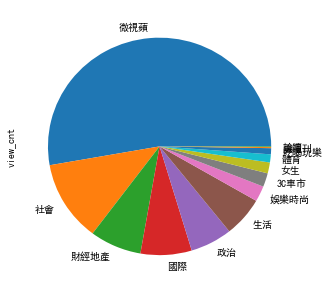

In [253]:
% pylab inline
plt.rcParams['font.sans-serif'] = ['simhei']
newsdf.groupby('category')['view_cnt'].mean().sort_values(ascending=False).plot(kind = 'pie', figsize = [5,5])

In [254]:
newsdf.to_clipboard()

In [255]:
newsdf.to_csv('applenews.csv', encoding='utf-8-sig')

In [256]:
newsdf.to_excel('applenews.xlsx')

## Shopee

In [314]:
import requests
headers = {

'referer': 'https://shopee.tw/search?keyword=s8%20%E6%89%8B%E6%A9%9F%E6%AE%BC'    ,
#'x-api-source': 'pc',
#'x-requested-with': 'XMLHttpRequest'    ,
'user-agent': 'Mozilla/5.0 (Windows NT 6.1; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/69.0.3497.100 Safari/537.36'   
}
res = requests.get('https://shopee.tw/api/v2/search_items/?by=relevancy&keyword=s8%20%E6%89%8B%E6%A9%9F%E6%AE%BC&limit=50&newest=0&order=desc&page_type=search', headers = headers)


In [316]:
res.json()['items'][0]['image']

'a0c4dadfe3eea797b45c4ea230ff19b7'

In [ ]:
img_url = 'https://cf.shopee.tw/file/{}_tn'
for i in res.json()['items']:
    imgname = i.get('image')
    img = img_url.format(imgname)
    #print(imgname)
    res2 = requests.get(img)
    with open('{}.jpg'.format(imgname), 'wb') as f:
        f.write(res2.content)
    

In [272]:

res = requests.get('https://cf.shopee.tw/file/a0c4dadfe3eea797b45c4ea230f f19b7_tn')
with open('1.jpg', 'wb') as f:
    f.write(res.content)

## 表特板爬蟲


In [317]:
import requests
res = requests.get('https://i.imgur.com/QNkrGxJ.jpg')
with open('QNkrGxJ.jpg','wb') as f:
    f.write(res.content)

In [323]:
import requests
from bs4 import BeautifulSoup
res = requests.get('https://www.ptt.cc/bbs/Beauty/M.1538293891.A.8B9.html')
soup = BeautifulSoup(res.text, 'lxml')
for imgurl in soup.select('#main-content a'):
    img = imgurl.get('href')
    if ('https:' in img) and ('jpg' in img):
        res = requests.get(img)
        with open(img.split('/')[-1],'wb') as f:
            f.write(res.content)

## 591 租屋網

In [326]:
import requests
headers = {
   'User-Agent': 'Mozilla/5.0 (Windows NT 6.1; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/69.0.3497.100 Safari/537.36' 
    
}
res = requests.get('https://rent.591.com.tw/home/search/rsList?is_new_list=1&type=1&kind=1&searchtype=1&region=1&section=5&firstRow=60&totalRows=919', headers = headers)
res

<Response [200]>

In [331]:
# json => dict
#res.json()['data']['data']

In [332]:
import pandas
df = pandas.DataFrame(res.json()['data']['data'])

In [339]:
df.head(3)

,addInfo,addition2,addition3,addition4,addr_number_name,address,address_img,address_img_title,alley_name,allfloor,...,storeprice,street_name,streetid,type,unit,updatetime,user_id,vipBorder,vipimg,vipstyle
0,"<img src=""./images/index/userCenter/list_vip_v...",0,0,0,,溫州街48巷MRT台電大樓華..,MRT台電大樓華廈大空間寧靜四房三衛,MRT台電大樓華廈大空間寧靜四房三衛,48巷,6,...,0,溫州街,25670,1,元/月,1536299033,1530610,vipStyle,"<img src=""./images/index/userCenter/list_vip_v...",isvip
1,"<img src=""./images/index/userCenter/list_vip_v...",0,0,0,,光復南路板南線國館..,板南線國館商圈美寓,板南線國館商圈美寓,,4,...,0,光復南路,25623,1,元/月,1537596864,58727,vipStyle,"<img src=""./images/index/userCenter/list_vip_v...",isvip
2,"<img src=""./images/index/userCenter/list_vip_v...",0,0,0,,瑞安街31巷靜巷純住三房●..,靜巷純住三房●通風佳光線明亮●租金含稅,靜巷純住三房●通風佳光線明亮●租金含稅,31巷,6,...,0,瑞安街,25671,1,元/月,1538136958,1611062,vipStyle,"<img src=""./images/index/userCenter/list_vip_v...",isvip


In [ ]:
https://rent.591.com.tw/home/search/rsList?is_new_list=1&type=1&kind=1&searchtype=1&region=1&section=5&firstRow=60&totalRows=919
https://rent.591.com.tw/home/search/rsList?is_new_list=1&type=1&kind=1&searchtype=1&region=1&section=5&firstRow=90&totalRows=919

In [338]:
import math
for i in range(0, math.ceil(919/ 30)):

    print(i * 30)

0
30
60
90
120
150
180
210
240
270
300
330
360
390
420
450
480
510
540
570
600
630
660
690
720
750
780
810
840
870
900


In [342]:
a = [1,2,3]
b = [2,3,4]
a.extend(b)
a

[1, 2, 3, 2, 3, 4]

In [344]:
import requests
import math
import time

houseurl = 'https://rent.591.com.tw/home/search/rsList?is_new_list=1&type=1&kind=1&searchtype=1&region=1&section=5&firstRow={}&totalRows=919'

headers = {
   'User-Agent': 'Mozilla/5.0 (Windows NT 6.1; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/69.0.3497.100 Safari/537.36' 
    
}

houseary = []
for i in range(0, math.ceil(919/ 30)):
    res = requests.get(houseurl.format(i * 30), headers = headers)
    houseary.extend(res.json()['data']['data'])
    time.sleep(1)

In [346]:
len(houseary)

917

In [347]:
import pandas
housedf = pandas.DataFrame(houseary)

In [349]:
housedf.head()

,addInfo,addition2,addition3,addition4,addr_number_name,address,address_img,address_img_title,alley_name,allfloor,...,storeprice,street_name,streetid,type,unit,updatetime,user_id,vipBorder,vipimg,vipstyle
0,,0,0,1,,新生南路一段103巷靠近東..,靠近東區最安靜的住宅,靠近東區最安靜的住宅,103巷,6,...,0,新生南路一段,25667,1,元/月,1537185482,165407,vipStyle,,isvip
1,,0,0,1,,復興南路一段大安捷運站優..,大安捷運站優質3房2廳2衛豪宅,大安捷運站優質3房2廳2衛豪宅,,14,...,0,復興南路一段,25660,1,元/月,1538046376,1372887,vipStyle,,isvip
2,,0,0,1,,信義路二段10巷大安區金甌..,大安區金甌女中附近,大安區金甌女中附近,10巷,4,...,0,信義路二段,25646,1,元/月,1537162756,2463993,vipStyle,,isvip
3,,0,0,1,,仁愛路四段151巷可商用。..,可商用。明曜商圈。忠孝敦化。三普名人巷,可商用。明曜商圈。忠孝敦化。三普名人巷,151巷,13,...,0,仁愛路四段,67192,1,元/月,1537612318,1434864,vipStyle,,isvip
4,,0,0,1,,新生南路三段台大景觀名宅..,台大景觀名宅。24H管理。安靜住宅大兩廳,台大景觀名宅。24H管理。安靜住宅大兩廳,,22,...,0,新生南路三段,25669,1,元/月,1537612469,1434864,vipStyle,,isvip


In [353]:
housedf[['address', 'houseid', 'price']].sort_values('price', ascending=False).head()

,address,houseid,price
397,安和路二段@@大安敦南信義安和..,6796305,"99,990"
588,羅斯福路三段台電大樓公館屋新..,6845312,"99,000"
906,羅斯福路三段珍貴地段稀有典藏,6783599,"99,000"
702,光復南路逸仙首馥大4房,6840081,"98,000"
229,羅斯福路三段★公館商圈★時尚..,6780907,"98,000"


In [354]:
housedf.to_excel('house591.xlsx')